In [7]:
# Import libraries
import csv
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Set filepath
repository='/home/ebb505/ARE_Project/are-logs/'
replicate='ns_8_3_15-24-51-1895/'
filename='morphdesc.csv'
filepath=repository+replicate+filename
print('Filepath: ' + filepath)

Filepath: /home/ebb505/ARE_Project/are-logs/ns_8_3_15-24-51-1895/morphdesc.csv


In [9]:
# Import data from csv
my_list = []
with open(filepath, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_list.append(row[:-1]) # Last element is blank

In [10]:
# Characteristics
counter = 0
elementX = 5
elementY = 6
xVariable = "Wheels"
yVariable = "Sensors"
population = 25
evaluations = len(my_list)
featureSize = len(my_list[0])
print("Number of evaluations: ", evaluations, "Features size: ", featureSize)

Number of evaluations:  24125 Features size:  8


In [11]:
# Explore grid
dat = np.array([[float(y) for y in x] for x in my_list]) # Convert to array
progress = []
for ev in range(population,evaluations,population):
  for i in np.arange(0.05,0.95,0.1):
    for j in np.arange(0.05,0.95,0.1):
      for elem in dat[:ev,:]:
        if((i - 0.06 < elem[elementX]) and (elem[elementX] < i + 0.06) and (j - 0.0 < elem[elementY]) and (elem[elementY] < j + 0.06)):
          counter = counter + 1
          break;
  progress.append(counter)
  #print (counter)
  counter = 0
#print(progress)

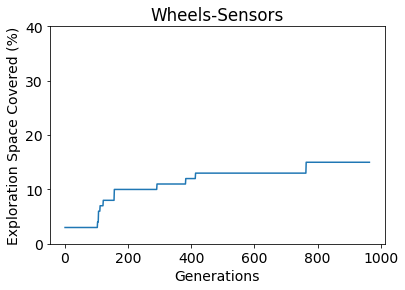

In [12]:
# Plot stuff
xValues = list(range(population, evaluations, population))
xValues = [x/population for x in xValues]
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

plt.plot(xValues, progress)
plt.xlabel('Generations')
plt.ylabel('Exploration Space Covered (%)')
plt.title(xVariable + "-" + yVariable)
axes = plt.gca()
axes.set_ylim([0,40.0])
filename = "progress" + xVariable + yVariable + ".png"
plt.savefig(repository+replicate+xVariable+yVariable+'.png', dpi=200)
